In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('./data/result_final.csv', parse_dates=['baseYmd'])
df

,areaNm,touNum,baseYmd,avgTemp,dayRf,daySf,festival,holiday,PM10,PM25,AccumulateCovid19,increase,localIncrease,CovidForeigner
0,서울특별시,1171117.50,2022-01-01,-4.3,0.0,0.0,no,yes,no,no,226698.0,1464.0,1429.0,35.0
1,부산광역시,445102.00,2022-01-01,1.9,0.0,0.0,no,yes,no,no,25287.0,212.0,210.0,2.0
2,대구광역시,264113.50,2022-01-01,-2.3,0.0,0.0,no,yes,no,no,23249.0,125.0,125.0,0.0
3,인천광역시,496692.00,2022-01-01,-3.4,0.0,0.0,no,yes,no,no,36962.0,241.0,239.0,2.0
4,광주광역시,161028.00,2022-01-01,-0.1,0.0,0.0,no,yes,no,no,8118.0,92.0,91.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,전라북도,221235.00,2022-09-03,25.3,0.0,0.0,yes,yes,no,no,788103.0,3442.0,3431.0,11.0
6201,전라남도,304470.25,2022-09-03,24.1,0.5,0.0,yes,yes,no,no,776823.0,3048.0,3041.0,7.0
6202,경상북도,425582.50,2022-09-03,21.0,0.1,0.0,no,yes,no,no,1042687.0,4782.0,4753.0,29.0
6203,경상남도,363550.25,2022-09-03,21.0,6.6,0.0,no,yes,no,no,1406209.0,5373.0,5362.0,11.0


In [13]:
seoul = df.loc[df['areaNm'] == '서울특별시']
seoul

,areaNm,touNum,baseYmd,avgTemp,dayRf,daySf,festival,holiday,PM10,PM25,AccumulateCovid19,increase,localIncrease,CovidForeigner
0,서울특별시,1171117.5,2022-01-01,-4.3,0.0,0.0,no,yes,no,no,226698.0,1464.0,1429.0,35.0
17,서울특별시,1112258.0,2022-01-02,-1.3,0.3,0.5,no,yes,no,no,227879.0,1183.0,1127.0,56.0
34,서울특별시,1067566.5,2022-01-03,-1.9,0.0,0.0,no,no,no,no,228867.0,993.0,964.0,29.0
51,서울특별시,1134094.5,2022-01-04,-2.5,0.0,0.0,no,no,no,no,229801.0,938.0,903.0,35.0
68,서울특별시,1175737.5,2022-01-05,-2.8,0.0,0.0,no,no,no,no,231213.0,1412.0,1346.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,서울특별시,1508164.0,2022-08-18,25.6,0.0,0.0,no,no,no,no,4272669.0,8246.0,8239.0,7.0
6137,서울특별시,1508164.0,2022-08-19,26.0,66.1,0.0,no,no,no,no,4272669.0,8246.0,8239.0,7.0
6154,서울특별시,1508164.0,2022-08-20,28.2,0.0,0.0,no,yes,no,no,4272669.0,8246.0,8239.0,7.0
6171,서울특별시,1508164.0,2022-09-02,24.7,0.0,0.0,no,no,no,no,4574258.0,13325.0,13313.0,12.0


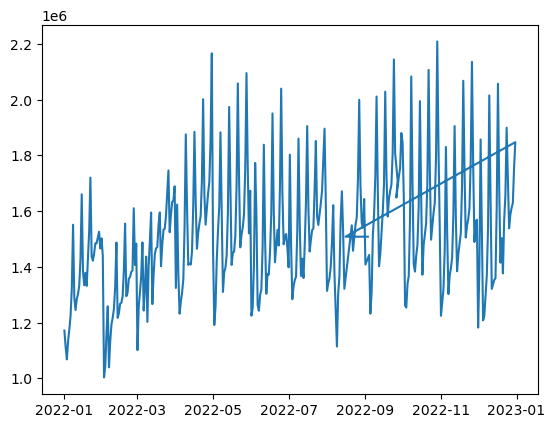

In [14]:
train = seoul[0:365]
test = seoul[365:0]
plt.plot(train['baseYmd'], train['touNum'])
plt.show()

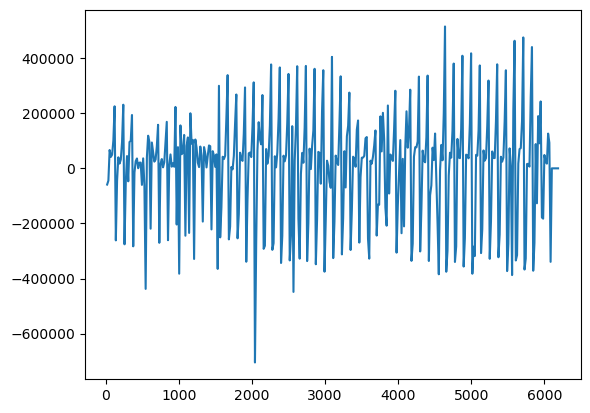

In [15]:
diff_1 = train['touNum'].diff().dropna()
plt.plot(diff_1)
plt.show()

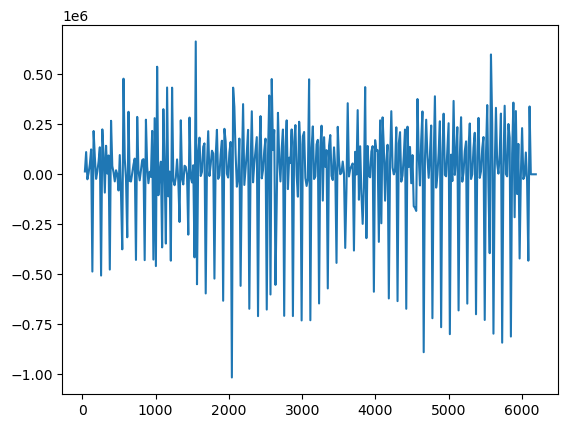

In [16]:
diff_2 = diff_1.diff().dropna()
plt.plot(diff_2)
plt.show()